In [70]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
x=[]
y=[]
bhagyax0=[]
bhagyax1=[]
with open("data2.csv","r") as csvfile:
    lines=csv.reader(csvfile)
    dataset=list(lines)
    for i in range(len(dataset)):
        temp=dataset[i][0].split(",")
        a,b=float(temp[0]),float(temp[1])
        c=int(temp[2],2)
        if(c==0):
            bhagyax0.append([a,b])
        if(c==1):
            bhagyax1.append([a,b])
        x.append([a,b,a*a,b*b])
        y.append([c])
one=np.ones([len(x),1])
x=np.concatenate((one,x),axis=1)
y=np.array(y)
bhagyax0=np.array(bhagyax0)
bhagyax1=np.array(bhagyax1)

In [71]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.3)
#theta = np.matrix(np.zeros(5))
theta = np.matrix(np.random.rand(x_train.shape[1],1))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#set gradient parameters
alpha = 0.1
iters = 8000
theta=theta.T
print(theta.shape)

(82, 5) (36, 5) (82, 1) (36, 1)
(1, 5)


parameters after gradient descent= [[ 2.24951387  0.43001544  0.92436124 -4.94283929 -4.37283504]]
(1, 5)


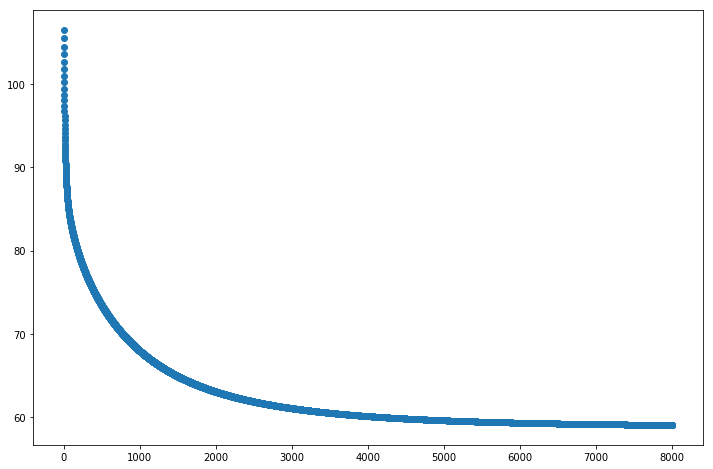

correct predictions out of 36 test points is  29
Accuracy achieved= 80.55555555555556 %


In [72]:
## Batch Gradient Descent ##
var=0.1
def gradientDescent(X,Y,theta,iters,alpha):
    cost=[]
    for i in range(0,iters):
        hypothesis=X*theta.T
        hypothesis=1/(1+np.exp((-1)*hypothesis))
        temp=np.log2(hypothesis)
        temp1=np.log2(1-hypothesis)
        v1=(-1)*(np.matmul(Y.T,temp))
        v2=(-1)*(np.matmul((1-Y).T,temp1))
        loss=hypothesis-Y
        fvalue=v1+v2
        cost.append(v1+v2)
        #if i>0:
            #print("iteration=",i,"| cost=",cost[i])
        gradient=(loss.T*X)/len(X)
        theta=theta-(alpha*(gradient+var/len(X)*theta))
    return theta,cost

g,cost=gradientDescent(x_train,y_train,theta,iters,alpha)
print("parameters after gradient descent=",g)
print(g.shape)
it=np.arange(0,iters)
#plt.plot(it,np.squeeze(cost))
plt.scatter(it,np.squeeze(cost))
plt.show()

##calculating sum of squared error of the test data
tempy=np.matmul(x_test,g.transpose())
tempy=1/(1+np.exp((-1)*tempy))
tempy=np.where(tempy>=0.5,1,0)
tempy=np.squeeze(tempy)
count=0
for i in range(0,len(tempy)):
    #print(tempy[i]," ",y_test[i])
    if(tempy[i]==y_test[i]):
        count=count+1
print("correct predictions out of 36 test points is ",count)
print("Accuracy achieved=",count/len(tempy)*100,"%")

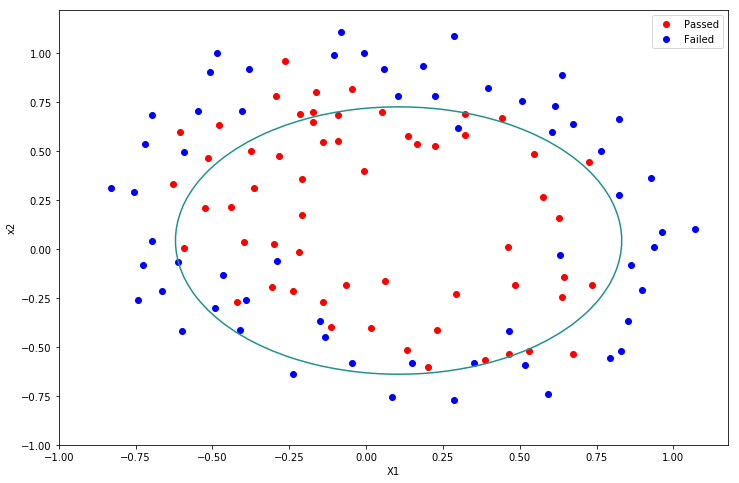

In [76]:
u = np.linspace(-1, 1.0, 50)
v = np.linspace(-1, 1.0, 50)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = g[0,0]+g[0,1]*u[i]+g[0,2]*v[j]+g[0,3]*u[i]*u[i]+g[0,4]*v[j]*v[j]

failed = plt.scatter([bhagyax0[:,0]],[bhagyax0[:,1]],c='b',label='y=0')
passed = plt.scatter([bhagyax1[:,0]],[bhagyax1[:,1]],c='r',label='y=1')
plt.contour(u,v,z,0)
plt.xlabel('X1')
plt.ylabel('x2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()
